Machine Learning Project on Students' Adaptability to Online Education

The aim of this project is to find the best machine learning model to predict students' adaptability levels to online education.
There are three possible adaptability levels, so the classification method used is multinomial logistic regression. Logistic regression refers to predicting class labels, and "multinomial" indicates that there are more than two classes.

For implementation, I will use pre-built functions from Pandas, NumPy, and Sklearn, and for visualizations, I will utilize Matplotlib and Seaborn. The documentation for these libraries will be referenced as needed.

The dataset is sourced from Kaggle: Students’ Adaptability Level in Online Education Dataset.

Reference to the original research paper:
Hasan Suzan, M., Samrin, N. A., Biswas, A. A., and Pramanik, A. (2021). Students’ Adaptability Level Prediction in Online Education Using Machine Learning Approaches. IEEE Xplore. Accessed 16.11.2024.

As this is my own project, aimed at practicing machine learning, I will be doing everything in this notebook—code, interpretations, etc.—as I find it more convenient not to do them separately. This kind of layout might be easier to understand for the reader. 


In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, log_loss

Read the file containing the data 

In [247]:
data = pd.read_csv("adaptability_level_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


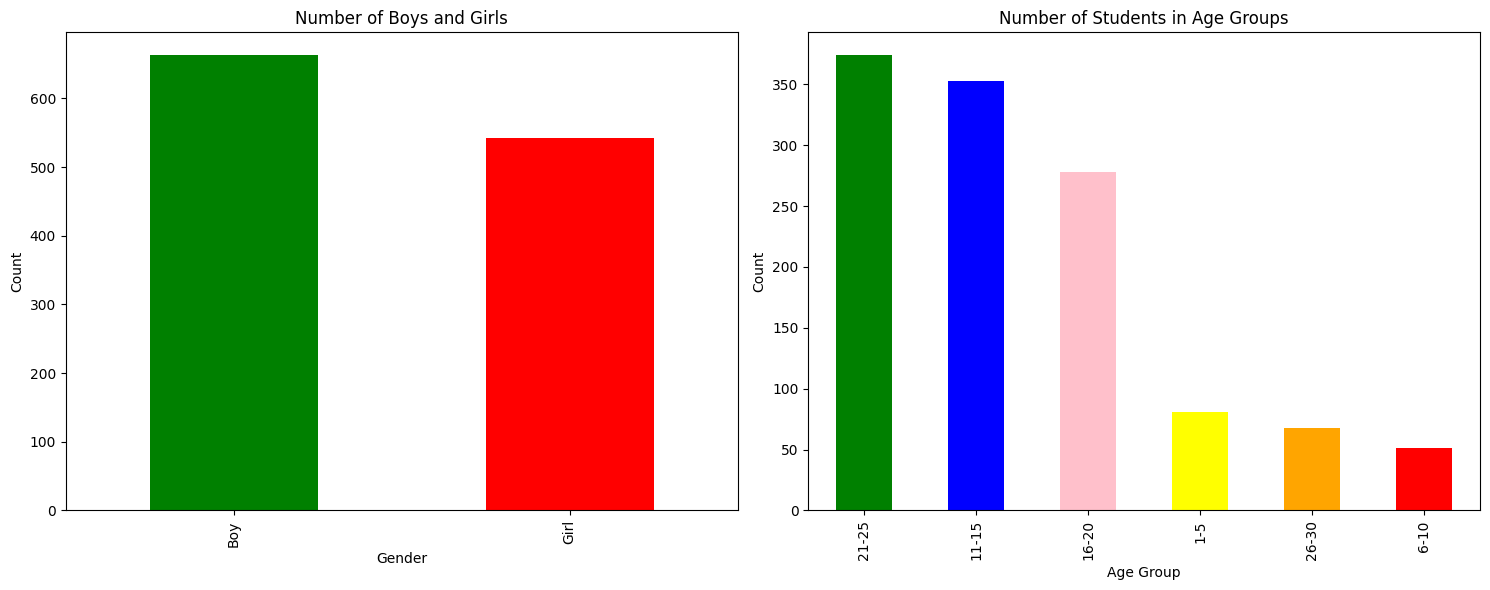

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
data['Gender'].value_counts().plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Number of Boys and Girls')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

data['Age'].value_counts().plot(kind='bar', color=['green', 'blue', 'pink', 'yellow', 'orange', 'red'], ax=axes[1])
axes[1].set_title('Number of Students in Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

The data contains 1205 lines, with each line representing the information of one student. It includes 13 features (numbered 0-12) and one label, "Adaptivity Level" (number 13). These features are intended to assign the correct label to a student based on their characteristics (features). All data points are non-numerical, which means they need to be converted into numerical form.

First convert data type of each feature to string, so it's easier to process.

In [249]:
for column_name in data.columns:
    data[column_name] = data[column_name].astype(str)
print(data.head)

<bound method NDFrame.head of      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \


Drop students in the age group 1-5, as they are too young to be considered proper students.

In [250]:
data = data[data["Age"] != '1-5']
print(f"Number of data points: {data["Age"].size}.")

Number of data points: 1124.


Identify all possible values for each feature and convert them into numerical format. In this case, the features are all values of the columns except for Adaptivity Level, which is the label.

In [251]:
for column_name in data.columns:
    print(column_name)
    print(data[column_name].unique())
    print()

Gender
['Boy' 'Girl']

Age
['21-25' '16-20' '11-15' '26-30' '6-10']

Education Level
['University' 'College' 'School']

Institution Type
['Non Government' 'Government']

IT Student
['No' 'Yes']

Location
['Yes' 'No']

Load-shedding
['Low' 'High']

Financial Condition
['Mid' 'Poor' 'Rich']

Internet Type
['Wifi' 'Mobile Data']

Network Type
['4G' '3G' '2G']

Class Duration
['3-6' '1-3' '0']

Self Lms
['No' 'Yes']

Device
['Tab' 'Mobile' 'Computer']

Adaptivity Level
['Moderate' 'Low' 'High']



In [252]:
data['Gender'] = data['Gender'].map({'Boy': 0, 'Girl': 1})
data['Age'] = data['Age'].map({'6-10': 0, '11-15': 1, '16-20': 2, '21-25': 3, '26-30': 4})
data['Education Level'] = data['Education Level'].map({'School': 0, 'College': 1, 'University': 2})
data['Institution Type'] = data['Institution Type'].map({'Non Government': 0, 'Government': 1})
data['IT Student'] = data['IT Student'].map({'No': 0, 'Yes': 1})
data['Location'] = data['Location'].map({'No': 0, 'Yes': 1})
data['Load-shedding'] = data['Load-shedding'].map({'Low': 0, 'High': 1})
data['Financial Condition'] = data['Financial Condition'].map({'Poor': 0, 'Mid': 1, 'Rich': 2})
data['Internet Type'] = data['Internet Type'].map({'Wifi': 0, 'Mobile Data': 1})
data['Network Type'] = data['Network Type'].map({'2G': 0, '3G': 1, '4G': 2})
data['Class Duration'] = data['Class Duration'].map({'0': 0, '1-3': 1, '3-6': 2})
data['Self Lms'] = data['Self Lms'].map({'No': 0, 'Yes': 1})
data['Device'] = data['Device'].map({'Mobile': 0, 'Tab': 1, 'Computer': 2})

print(data.head)

<bound method NDFrame.head of       Gender  Age  Education Level  Institution Type  IT Student  Location  \
0          0    3                2                 0           0         1   
1          1    3                2                 0           0         1   
2          1    2                1                 1           0         1   
3          1    1                0                 0           0         1   
4          1    2                0                 0           0         1   
...      ...  ...              ...               ...         ...       ...   
1200       1    2                1                 0           0         1   
1201       1    2                1                 0           0         0   
1202       0    1                0                 0           0         1   
1203       1    2                1                 0           0         0   
1204       1    1                0                 0           0         1   

      Load-shedding  Financial Co

Find all possible label values.

In [253]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


Create a data frame without labels and scale the feature values using method StandardScaler to make them approximately normally distributed.

In [254]:
X_multi = data.drop(columns=['Adaptivity Level'])
feature_names = X_multi.columns
multi_labels = ['Low', 'Moderate', 'High']     # correct order of labels, which is used in plottig confusion matrix

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_multi)
scaled_data_frame = pd.DataFrame(scaled_data, columns = feature_names)
scaled_data_frame.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.855509,0.920340,1.107532,-0.708995,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,1.675460,-0.475117,0.964949
1,1.168895,0.920340,1.107532,-0.708995,-0.608877,0.558168,2.142905,0.223311,0.890317,0.763558,-0.094481,2.104745,-0.443626
2,1.168895,-0.047351,-0.006941,1.410447,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,-0.094481,-0.475117,-0.443626
3,1.168895,-1.015042,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,0.223311,0.890317,0.763558,-0.094481,-0.475117,-0.443626
4,1.168895,-0.047351,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,-1.800893,0.890317,-1.147888,-1.864421,-0.475117,-0.443626


Divide data randomly into training data (80%), validation data (10%) and test data (10%).

In [255]:
X_train, X_val, y_train, y_val = train_test_split(scaled_data_frame, data['Adaptivity Level'], test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

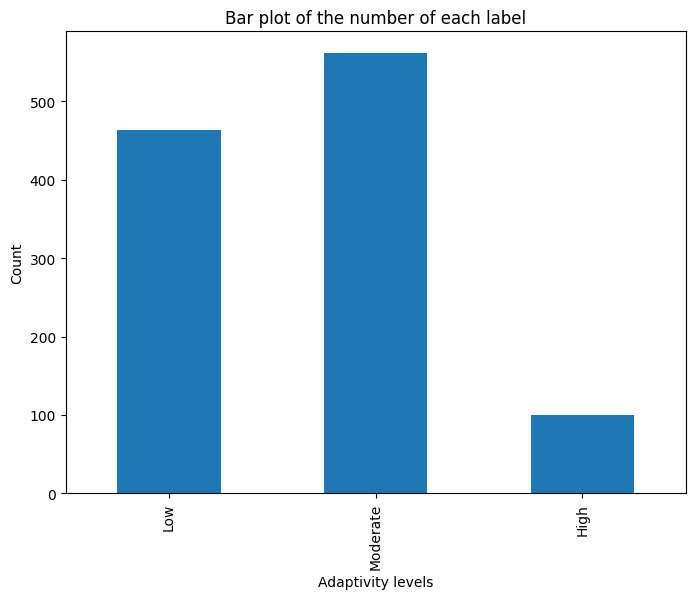

In [256]:
plt.figure(figsize=(8, 6))
# sort the data
data['Adaptivity Level'] = pd.Categorical(data['Adaptivity Level'], categories=multi_labels, ordered=True)
# create plot of sorted data
data['Adaptivity Level'].value_counts(sort=False).reindex(multi_labels).plot(kind='bar')

plt.xlabel("Adaptivity levels")
plt.ylabel("Count")
plt.title("Bar plot of the number of each label")
plt.show()

Next, principal component analysis is performed to identify any non-significant features. The aim is to reduce the dimensionality (number of features) of the model, making it simpler while retaining as much information as possible.

The scree plot below shows the principal components, with the first component explaining the most variance, followed by the others in descending order. The PCA function tries to place as much information as possible in the components on the left. If components on the left are highly correlated with those on the right, the latter will explain very little variance and should be considered for removal. 


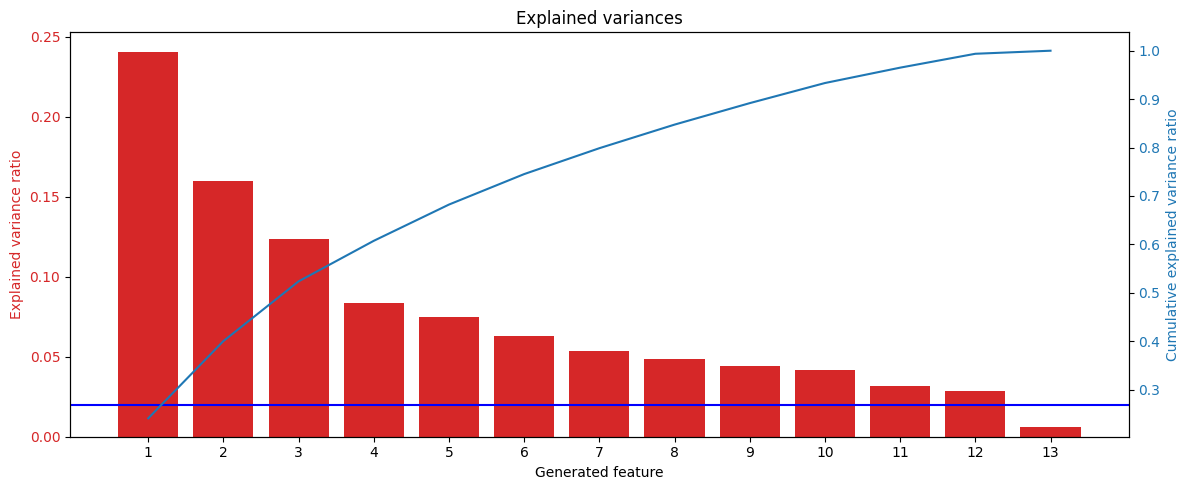

In [257]:
# use all features the training data
N = len(X_train.columns)
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)

# scree plot
fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:red'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color=color)
ax1.set_xticks(1+np.arange(N))
ax1.tick_params(axis='y', labelcolor=color)
plt.title("Explained variances")
ax1.set_ylabel("Explained variance ratio", color=color)
ax1.set_xlabel("Generated feature")

# a line indicating an explained variance ratio below 2%
plt.axhline(y = 0.02, color = 'b', linestyle = '-')

# plot cumulative explained variance ratio
# indicates how much information is retained when including the corresponding feature in the model
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color=color)
ax2.set_ylabel("Cumulative explained variance ratio", color=color)

fig.tight_layout()
plt.show()

Features with an explained variance ratio under 2% will be removed, meaning one feature. As can be seen from the plot, removing feature 13 will not significantly decrease the cumulative explained variance ratio. Next, remove one feature from all datasets.

In [258]:
N = 12
pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.fit_transform(X_val)
X_test_reduced = pca.fit_transform(X_test)


Now, it's time to determine the best model for this machine learning problem. Three models will be tested: multinomial logistic regression, a decision tree, and k-nearest neighbors. The accuracy_score function from Scikit-learn will be used to calculate the accuracy of each model. In this context, accuracy refers to the proportion of predictions made by the model that match the correct labels in the dataset. The accuracy score will be computed for both the training and validation datasets. Ideally, the accuracy scores should not differ significantly. However, it is expected that the accuracy will be slightly higher for the training data, as it is used to fit the model.

According to Hendricks (n.d., https://www.deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/), an accuracy score above 0.70 is considered realistic and acceptable. Therefore, I will use this as justification. Since the dataset is relatively small, a slightly lower accuracy score might also be acceptable.

Multinomial logistic regression. 

LogisticRegression() from Sklearn's linear_model module will be used as the model. 

Accuracy scores

Training data: 0.73860
Validation data: 0.71429


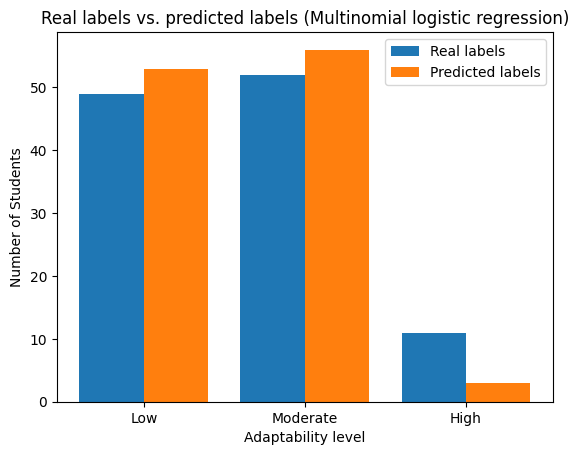

In [259]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

predicted_y_train_1 = model1.predict(X_train)
multi_accuracy_train_1 = accuracy_score(y_train, predicted_y_train_1)

predicted_y_val_1 = model1.predict(X_val)
multi_accuracy_val_1 = accuracy_score(y_val, predicted_y_val_1)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_1:.5f}")
print(f"Validation data: {multi_accuracy_val_1:.5f}")

# visualize results of validation data
X_axis = np.arange(len(multi_labels)) 

real_labels_1 = y_val.value_counts(sort=False)
predicted_labels_1_pd = pd.Series(predicted_y_val_1).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
real_labels_1 = real_labels_1.reindex(multi_labels, fill_value=0)
predicted_labels_1_pd = predicted_labels_1_pd.reindex(multi_labels, fill_value=0)


plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_1_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (Multinomial logistic regression)") 
plt.legend() 
plt.show()

The results from using multinomial logistic regression are quite good, with accuracy scores being almost the same and above 0.7.

Decision Tree

The DecisionTreeClassifier() from Sklearn's tree module will be used as the model. Different depths of the tree will be tested, and the best one will be chosen based on the accuracy score. Often, a tree with too much depth leads to overfitting.

Accuracy scores

Training data: 0.82314
Validation data: 0.78571


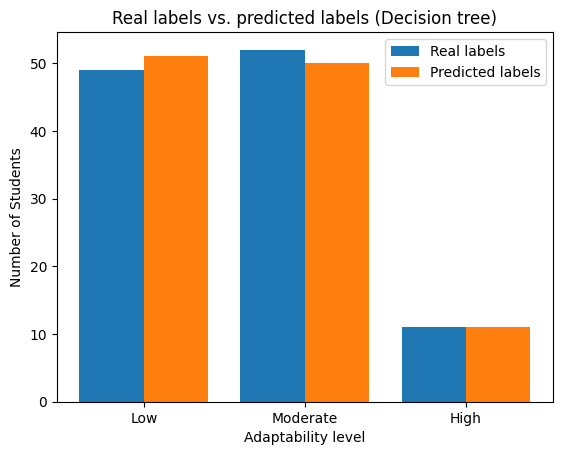

In [260]:
model2 = DecisionTreeClassifier(max_depth=8)
model2.fit(X_train, y_train)

predicted_y_train_2 = model2.predict(X_train)
multi_accuracy_train_2 = accuracy_score(y_train, predicted_y_train_2)

predicted_y_val_2 = model2.predict(X_val)
multi_accuracy_val_2 = accuracy_score(y_val, predicted_y_val_2)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_2:.5f}")
print(f"Validation data: {multi_accuracy_val_2:.5f}")

# visualize results of validation data
predicted_labels_2_pd = pd.Series(predicted_y_val_2).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
predicted_labels_2_pd = predicted_labels_2_pd.reindex(multi_labels, fill_value=0)


plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_2_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (Decision tree)") 
plt.legend() 
plt.show()

Setting max depth to 8 lead the best result for accuracy score of validation data, which is slightly smaller than accuracy score for training data. Since the difference is around 0.04, there is no sign of significant overfitting, and the model can be considered good. 

K-nearest neighbors.

KNeighborsClassifier from Sklearn's neighbors module will be used as the model. The parameter n_neighbors specifies the number of nearest neighboring points to consider when classifying a data point. I will test different values for the n_neighbors parameter and select the best one based on the accuracy scores and the difference in accuracy between the training and validation sets. K-nearest neighbors is known for not performing well with data that has many features, but I will try it out.

Accuracy scores

Training data: 0.81535
Validation data: 0.78571


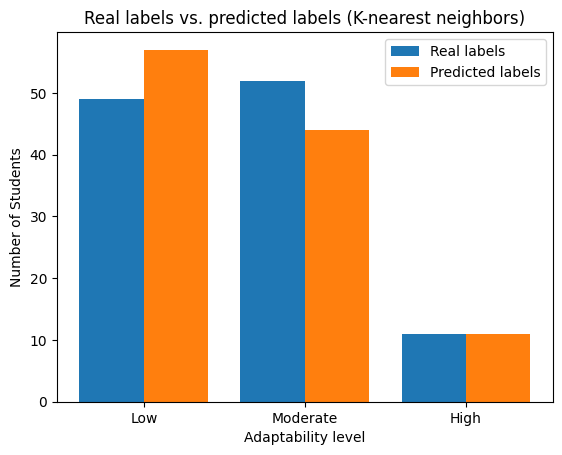

In [261]:
model3 = KNeighborsClassifier(n_neighbors = 10)
model3.fit(X_train, y_train)

predicted_y_train_3 = model3.predict(X_train)
multi_accuracy_train_3 = accuracy_score(y_train, predicted_y_train_3)

predicted_y_val_3 = model3.predict(X_val)
multi_accuracy_val_3 = accuracy_score(y_val, predicted_y_val_3)

print("Accuracy scores\n")
print(f"Training data: {multi_accuracy_train_3:.5f}")
print(f"Validation data: {multi_accuracy_val_3:.5f}")

# visualize results of validation data
predicted_labels_3_pd = pd.Series(predicted_y_val_3).value_counts(sort=False)      # convert to pandas series

# reindex labels in multi_labels order
predicted_labels_3_pd = predicted_labels_3_pd.reindex(multi_labels, fill_value=0)

plt.bar(X_axis - 0.2, real_labels_1, 0.4, label = 'Real labels')
plt.bar(X_axis + 0.2, predicted_labels_3_pd, 0.4, label = 'Predicted labels')

plt.xticks(X_axis, multi_labels) 
plt.xlabel("Adaptability level") 
plt.ylabel("Number of Students") 
plt.title("Real labels vs. predicted labels (K-nearest neighbors)") 
plt.legend() 
plt.show()

Setting the number of neighbors to 10 resulted in a good accuracy score for the validation data, with a small difference between the accuracy scores for training and validation. There is no significant overfitting detected.

Both the decision tree and K-nearest neighbors gave good results. Now, I will test the two models to determine which one performs better.

In [262]:
print("Accuracy scores\n")

print("Decision tree")
predicted_y_test_2 = model2.predict(X_test)
multi_accuracy_test_2 = accuracy_score(y_test, predicted_y_test_2)
print(f"Testing data: {multi_accuracy_test_2}")

print("K-nearest neighbors")
predicted_y_test_3 = model3.predict(X_test)
multi_accuracy_test_3 = accuracy_score(y_test, predicted_y_test_3)
print(f"Testing data: {multi_accuracy_test_3}")

Accuracy scores

Decision tree
Testing data: 0.8407079646017699
K-nearest neighbors
Testing data: 0.831858407079646


Based on these results, the decision tree is currently performing the best. After further interpreting the results, I will select the most suitable model.

Bar plots provide a good initial impression of the results but lack detail. For example, the bar plot for the decision tree appears much better than that for K-nearest neighbors, even though both models achieved the same accuracy score on the validation data. To analyze the results more precisely, confusion matrices will be used for all three models. Since the dataset contains 12 features, creating visualizations can be challenging, but confusion matrices are an effective solution.

Confusion matrices show the correct predictions, false positives, and false negatives, which define precision and recall. In the context of adaptability levels in online education, precision and recall are not as significant, but in fields like medicine or law, they should be studied further. Nevertheless, I will examine the differences in precision and recall to see if they provide any interesting insights of certain group/groups.

Precision is calculated as: true positives / (true positives + false positives).

Recall is calculated as: true positives / (true positives + false negatives).

In a good model, both precision and recall should be close to 1.

I will use confusion_matrix() from Sklearn and heatmap() from Seaborn to plot the matrix and overlay the heatmap on it, respectively.

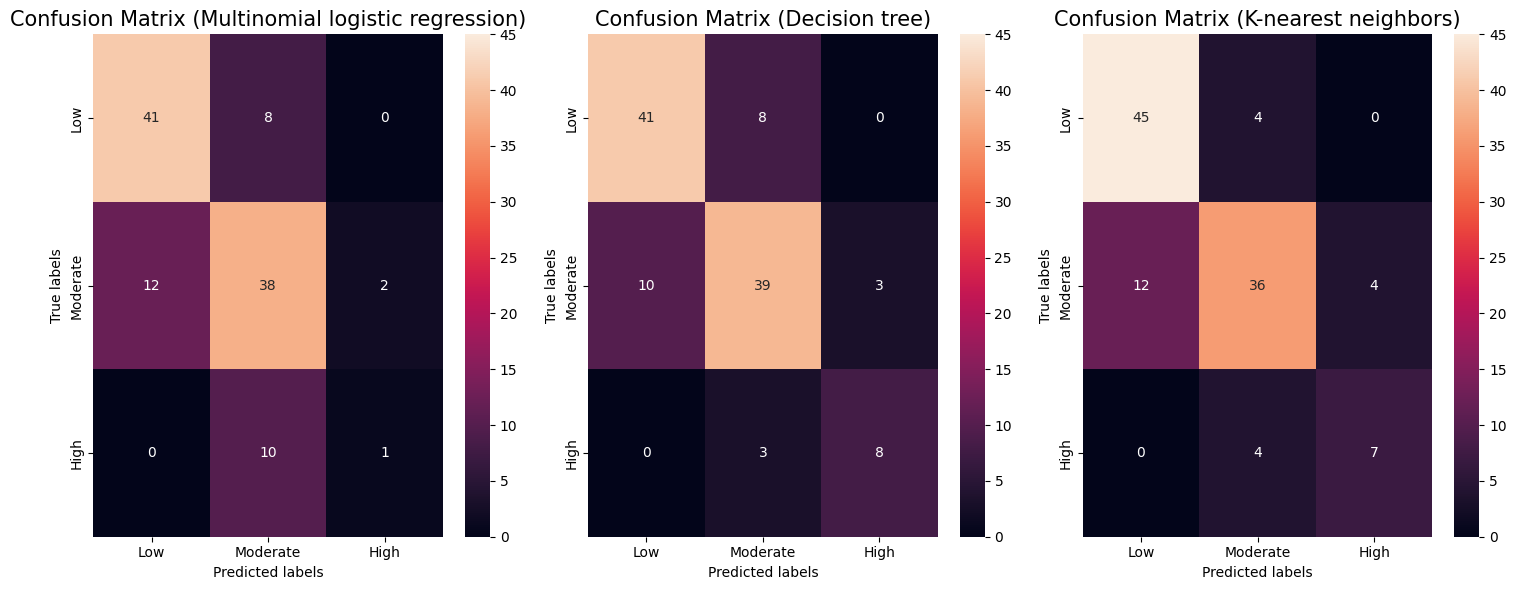

In [265]:
# Validation data is used
c_mat1 = confusion_matrix(y_val, predicted_y_val_1, labels=multi_labels)     
c_mat2 = confusion_matrix(y_val, predicted_y_val_2, labels=multi_labels)
c_mat3 = confusion_matrix(y_val, predicted_y_val_3, labels=multi_labels)

# Find the global min and max values to set consistent color scale across all subplots
vmin = min(c_mat1.min(), c_mat2.min(), c_mat3.min())
vmax = max(c_mat1.max(), c_mat2.max(), c_mat3.max())

# Set three plots visible
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Multinomial logistic regression
sns.heatmap(c_mat1, annot=True, fmt='g', ax=axes[0], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[0].set_xlabel('Predicted labels', fontsize=10)
axes[0].set_ylabel('True labels', fontsize=10)
axes[0].set_title('Confusion Matrix (Multinomial logistic regression)', fontsize=15)

# Decision tree
sns.heatmap(c_mat2, annot=True, fmt='g', ax=axes[1], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[1].set_xlabel('Predicted labels', fontsize=10)
axes[1].set_ylabel('True labels', fontsize=10)
axes[1].set_title('Confusion Matrix (Decision tree)', fontsize=15)

# K-nearest Neighbors
sns.heatmap(c_mat3, annot=True, fmt='g', ax=axes[2], vmin=vmin, vmax=vmax, xticklabels=multi_labels, yticklabels=multi_labels)
axes[2].set_xlabel('Predicted labels', fontsize=10)
axes[2].set_ylabel('True labels', fontsize=10)
axes[2].set_title('Confusion Matrix (K-nearest neighbors)', fontsize=15)

# show the plot
plt.tight_layout()
plt.show()

The confusion matrix should ideally have the highest possible values along its diagonal. We observe that, particularly for the 'Moderate' group, some students are misclassified into the 'Low' group, and vice versa. Since the 'High' group is relatively small, it is harder to interpret; however, there are instances where students from this group are misclassified as 'Moderate' and vice versa. On the positive side, no students from the 'Low' group are classified as 'High,' and vice versa.

Multinomial logistic regression
Low
Precision: 0.77. Recall: 0.84.
Moderate
Precision: 0.68. Recall: 0.73.
High
Precision: 0.33. Recall: 0.09.
-------------------------------------
Decision tree
Low
Precision: 0.80. Recall: 0.84.
Moderate
Precision: 0.78. Recall: 0.75.
High
Precision: 0.73. Recall: 0.73.
-------------------------------------
K-nearest neighbors
Low
Precision: 0.79. Recall: 0.92.
Moderate
Precision: 0.82. Recall: 0.69.
High
Precision: 0.64. Recall: 0.64.
-------------------------------------


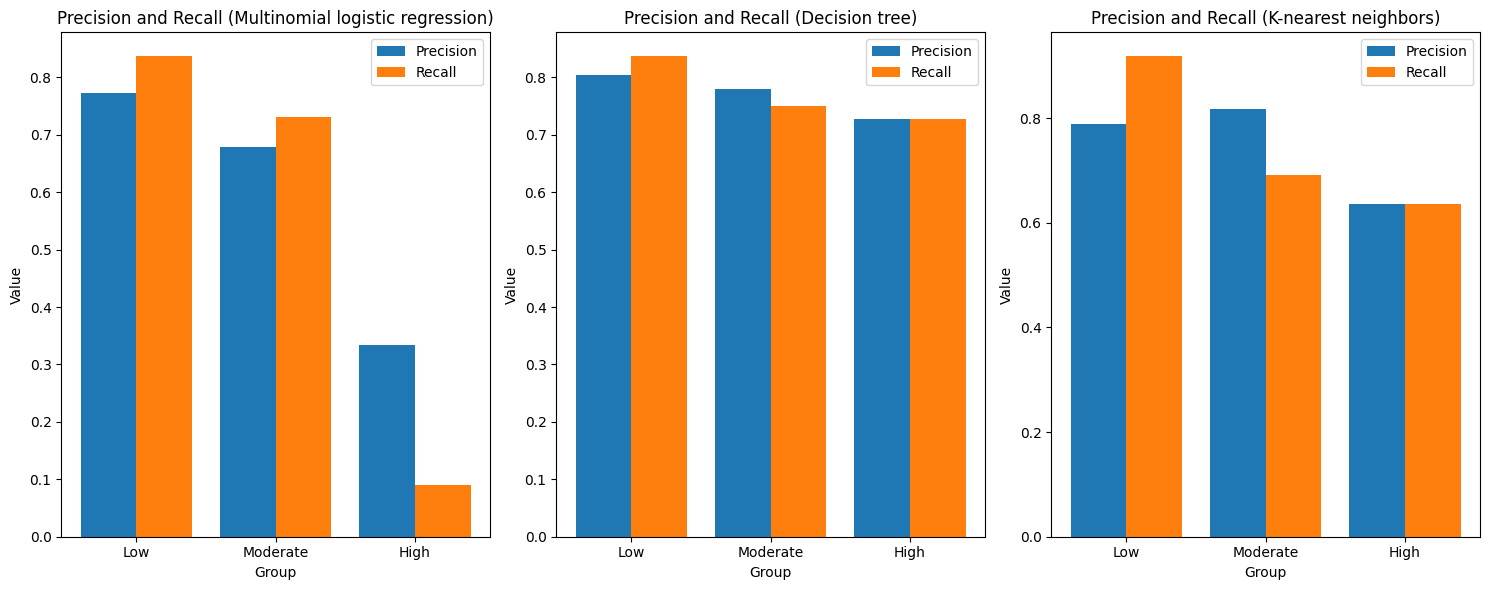

In [266]:
# compute precision and recall for each model

def precision_and_recall(matrix, index):
    true_positive = matrix[index][index]
    false_positive = 0
    false_negative = 0
    for i in range(3):
        if i != index:    
            false_positive += matrix[i][index]
            false_negative += matrix[index][i]
    return true_positive, false_positive, false_negative

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

precisions_all = []
recalls_all = []
for j in range(3):
    if j == 0:
        model = "Multinomial logistic regression"
        mat = c_mat1
    elif j == 1:
        model = "Decision tree"
        mat = c_mat2
    else:
        model = "K-nearest neighbors"
        mat = c_mat3

    print(model)
    precisions = []
    recalls = []
    for i in range(len(multi_labels)):
        tp, fp, fn = precision_and_recall(mat, i)
        print(multi_labels[i])
        if (tp + fp) > 0:
            precision = tp / (tp + fp) 
        else:
            precision = 0
        if (tp + fn) > 0:
            recall = tp / (tp + fn)
        else:
            recall = 0
        precisions.append(precision)
        recalls.append(recall)
        print(f"Precision: {precision:.2f}. Recall: {recall:.2f}.")
    precisions_all.append(precisions)
    recalls_all.append(recalls)
    print("-------------------------------------")

    axes[j].bar(X_axis - 0.2, precisions, 0.4, label='Precision')
    axes[j].bar(X_axis + 0.2, recalls, 0.4, label='Recall')
    axes[j].set_xticks(X_axis)
    axes[j].set_xticklabels(multi_labels)
    axes[j].set_xlabel("Group")
    axes[j].set_ylabel("Value")
    axes[j].set_title(f"Precision and Recall ({model})")
    axes[j].legend()

plt.tight_layout()
plt.show()


Precision and recall should ideally be as close to 1 as possible. Generally, low precision for a group indicates that the model has predicted students for this group who do not actually belong there. Conversely, low recall for a group suggests that the model has incorrectly classified students belonging to this group into other groups.

All models seem to have low precision and recall for the group 'High'. This could be because the number of students in this group is significantly smaller compared to the other groups, making it harder for the model to correctly classify 'High'.

In the decision tree model, there does not appear to be a significant difference between precision and recall, and all groups have values relatively close to 1. However, a small number of students have been misclassified into the group 'Low' when they actually belong to 'Moderate'.

The K-nearest neighbors model exhibits lower precision for the group 'Low' and higher recall for the group 'High'. This suggests that the model has classified too many students from 'Moderate' into 'Low'.

The multinomial logistic regression model shows low recall for the group 'High' and lower precision compared to recall in the groups 'Low' and 'Moderate'. This indicates that many students have been classified into the group 'Moderate'. Notably, according to the confusion matrix, no students have been misclassified from 'High' to 'Low'.